In [135]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("..")
from KMeans import MyKMeans
from KMedian import MyKMedian
from sklearn.datasets import make_blobs
import random

In [37]:
# convert to numpy array
#X = data.values
X = np.array([[4583.0, 128.0], [3000.0, 66.0], [2583.0, 120.0], [6000.0, 141.0], [2333.0, 95.0], [3200.0, 70.0], [2500.0, 109.0], [1853.0, 114.0], [1299.0, 17.0], [4950.0, 125.0], [3596.0, 100.0], [3510.0, 76.0], [4887.0, 133.0], [2600.0, 115.0], [7660.0, 104.0], [2600.0, 116.0], [3365.0, 112.0], [2799.0, 122.0], [4226.0, 110.0], [1442.0, 35.0], [3750.0, 120.0], [3167.0, 74.0], [4692.0, 106.0], [3500.0, 114.0], [1828.0, 100.0], [3667.0, 144.0], [3748.0, 110.0], [3600.0, 80.0], [1800.0, 47.0], [2400.0, 75.0], [3941.0, 134.0], [4695.0, 96.0], [3410.0, 88.0], [5649.0, 44.0], [5821.0, 144.0], [2645.0, 120.0], [4000.0, 144.0], [1928.0, 100.0], [3086.0, 120.0], [4230.0, 112.0], [4616.0, 134.0], [2708.0, 97.0], [2132.0, 96.0], [3366.0, 135.0], [3357.0, 144.0], [2500.0, 120.0], [3029.0, 99.0], [4166.0, 116.0], [3200.0, 126.0], [7100.0, 125.0], [4300.0, 136.0], [1875.0, 97.0], [3500.0, 81.0], [4755.0, 95.0], [3750.0, 113.0], [1000.0, 110.0], [3333.0, 130.0], [3846.0, 111.0], [3988.0, 50.0], [2366.0, 136.0], [3333.0, 99.0], [2500.0, 104.0], [2958.0, 131.0], [3273.0, 81.0], [4133.0, 122.0], [3620.0, 25.0], [2484.0, 137.0], [1977.0, 50.0], [4188.0, 115.0], [1759.0, 131.0], [4288.0, 133.0], [3052.0, 100.0], [7333.0, 120.0], [2071.0, 94.0], [5316.0, 136.0], [2929.0, 139.0], [5050.0, 118.0], [2214.0, 85.0], [4166.0, 44.0], [2137.0, 137.0], [2957.0, 81.0], [3692.0, 93.0], [2014.0, 74.0], [2718.0, 70.0], [3459.0, 25.0], [4895.0, 102.0], [4583.0, 84.0], [3316.0, 88.0], [4200.0, 129.0], [2698.0, 122.0], [2330.0, 100.0], [1538.0, 30.0], [4860.0, 125.0], [6277.0, 118.0], [2281.0, 113.0], [3254.0, 50.0], [2980.0, 120.0], [1863.0, 98.0], [3089.0, 121.0], [9323.0, 75.0], [4583.0, 112.0], [2439.0, 129.0], [2237.0, 63.0], [1820.0, 95.0], [3522.0, 81.0], [4344.0, 87.0], [3497.0, 116.0], [2045.0, 101.0], [3750.0, 116.0], [2333.0, 102.0], [1916.0, 67.0], [4600.0, 73.0], [3625.0, 108.0], [2178.0, 66.0], [2383.0, 58.0], [4885.0, 48.0], [3858.0, 76.0], [4191.0, 120.0], [1907.0, 120.0], [3416.0, 113.0], [2600.0, 90.0], [3500.0, 135.0], [3917.0, 124.0], [4408.0, 120.0], [3244.0, 80.0], [3975.0, 55.0], [2479.0, 59.0], [3418.0, 127.0], [3430.0, 128.0], [5703.0, 130.0], [3173.0, 137.0], [3850.0, 100.0], [150.0, 135.0], [3727.0, 131.0], [5000.0, 72.0], [4283.0, 127.0], [2221.0, 60.0], [4009.0, 116.0], [2971.0, 144.0], [6250.0, 128.0], [4735.0, 138.0], [2491.0, 104.0], [3716.0, 42.0], [3189.0, 120.0], [3155.0, 140.0], [3463.0, 122.0], [3812.0, 112.0], [3315.0, 96.0], [5819.0, 120.0], [2510.0, 140.0], [6250.0, 108.0], [3406.0, 123.0], [6050.0, 120.0], [9703.0, 112.0], [6608.0, 137.0], [2882.0, 123.0], [1809.0, 90.0], [3427.0, 138.0], [2583.0, 104.0], [6045.0, 115.0], [5250.0, 94.0], [4931.0, 128.0], [2060.0, 134.0], [7200.0, 120.0], [5166.0, 128.0], [4708.0, 150.0], [3418.0, 135.0], [2876.0, 90.0], [3237.0, 30.0], [2833.0, 126.0], [2620.0, 150.0], [3900.0, 90.0], [2750.0, 115.0], [3103.0, 80.0], [4100.0, 124.0], [3927.0, 112.0], [2301.0, 78.0], [1811.0, 54.0], [3158.0, 89.0], [2600.0, 99.0], [3704.0, 120.0], [4124.0, 115.0], [3075.0, 139.0], [4400.0, 127.0], [3153.0, 134.0], [5417.0, 143.0], [4416.0, 110.0], [4666.0, 135.0], [2014.0, 113.0], [1800.0, 93.0], [2875.0, 105.0], [5000.0, 132.0], [1625.0, 96.0], [4000.0, 140.0], [3762.0, 135.0], [2400.0, 104.0], [2917.0, 84.0], [2927.0, 111.0], [2507.0, 56.0], [5746.0, 144.0], [3399.0, 111.0], [3717.0, 120.0], [2058.0, 88.0], [3541.0, 112.0], [2400.0, 115.0], [4342.0, 124.0], [3166.0, 132.0], [4917.0, 130.0], [4333.0, 110.0], [2500.0, 67.0], [4384.0, 117.0], [2935.0, 98.0], [2833.0, 71.0], [5503.0, 70.0], [4160.0, 71.0], [2378.0, 46.0], [3173.0, 74.0], [2583.0, 125.0], [3083.0, 126.0], [2666.0, 95.0], [5500.0, 105.0], [2423.0, 130.0], [3813.0, 116.0], [3875.0, 67.0], [3000.0, 100.0], [4723.0, 81.0], [4750.0, 130.0], [3013.0, 95.0], [6822.0, 141.0], [6216.0, 133.0], [2500.0, 96.0], [5124.0, 124.0], [3062.0, 111.0], [2764.0, 110.0], [4817.0, 120.0], [8750.0, 130.0], [4310.0, 130.0], [3069.0, 71.0], [5391.0, 130.0], [3333.0, 128.0], [7167.0, 128.0], [4566.0, 100.0], [3667.0, 113.0], [2346.0, 132.0], [2333.0, 136.0], [5488.0, 125.0], [2583.0, 120.0], [1993.0, 113.0], [3100.0, 113.0], [3276.0, 135.0], [3180.0, 71.0], [3033.0, 95.0], [3902.0, 109.0], [1500.0, 103.0], [2889.0, 45.0], [2755.0, 65.0], [2500.0, 103.0], [1963.0, 53.0], [4547.0, 115.0], [2167.0, 115.0], [2213.0, 66.0], [3867.0, 62.0], [2253.0, 110.0], [2995.0, 60.0], [1025.0, 112.0], [3246.0, 138.0], [5829.0, 138.0], [2720.0, 80.0], [1820.0, 100.0], [7250.0, 110.0], [2666.0, 121.0], [4606.0, 81.0], [5935.0, 133.0], [2920.0, 87.0], [2717.0, 60.0], [8624.0, 150.0], [6500.0, 105.0], [2425.0, 143.0], [3750.0, 100.0], [1926.0, 50.0], [7142.0, 138.0], [4707.0, 148.0], [3466.0, 130.0], [4652.0, 110.0], [3539.0, 55.0], [3340.0, 150.0], [2309.0, 125.0], [1958.0, 60.0], [3948.0, 149.0], [2483.0, 90.0], [7085.0, 84.0], [3859.0, 96.0], [4301.0, 118.0], [4354.0, 136.0], [7740.0, 128.0], [5191.0, 132.0], [4166.0, 98.0], [6000.0, 140.0], [2947.0, 70.0], [210.0, 98.0], [4333.0, 110.0], [2653.0, 113.0], [4691.0, 100.0], [2500.0, 93.0], [2873.0, 132.0], [3095.0, 113.0], [2083.0, 128.0], [1958.0, 131.0], [3547.0, 80.0], [2435.0, 75.0], [2699.0, 96.0], [3691.0, 110.0], [3597.0, 119.0], [3326.0, 105.0], [2600.0, 107.0], [4625.0, 111.0], [2895.0, 95.0], [645.0, 113.0], [3159.0, 100.0], [4050.0, 138.0], [3814.0, 124.0], [3583.0, 96.0], [3598.0, 100.0], [3283.0, 148.0], [2130.0, 70.0], [3466.0, 150.0], [2031.0, 113.0], [3074.0, 123.0], [3400.0, 95.0], [2192.0, 45.0], [2500.0, 55.0], [5677.0, 100.0], [3775.0, 110.0], [2679.0, 94.0], [6783.0, 130.0], [4281.0, 100.0], [3588.0, 110.0], [2550.0, 126.0], [3617.0, 107.0], [2917.0, 66.0], [4608.0, 140.0], [2138.0, 99.0], [3652.0, 95.0], [2239.0, 128.0], [3017.0, 102.0], [3358.0, 80.0], [2526.0, 145.0], [5000.0, 103.0], [2785.0, 110.0], [3593.0, 132.0], [5468.0, 26.0], [2667.0, 84.0], [3675.0, 108.0], [5800.0, 132.0], [4467.0, 120.0], [3333.0, 70.0], [3400.0, 123.0], [2378.0, 9.0], [3166.0, 104.0], [6406.0, 150.0], [3159.0, 108.0], [3087.0, 136.0], [3229.0, 110.0], [1782.0, 107.0], [1836.0, 90.0], [3166.0, 36.0], [1880.0, 61.0], [2787.0, 146.0], [2297.0, 104.0], [2165.0, 70.0], [4750.0, 94.0], [2726.0, 106.0], [3000.0, 56.0], [3859.0, 142.0], [3833.0, 110.0], [2987.0, 88.0], [5703.0, 128.0], [3232.0, 108.0], [2900.0, 71.0], [4106.0, 40.0], [4583.0, 133.0]]
)
print(X.shape)

(381, 2)


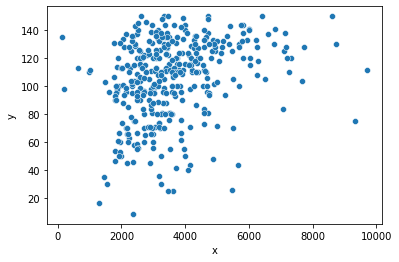

In [38]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [42]:
k = 4
kmeans = MyKMeans()
kmeans.fit(X, k)
centroids, clusters = kmeans.centroids, kmeans.clusters

Text(0, 0.5, 'y')

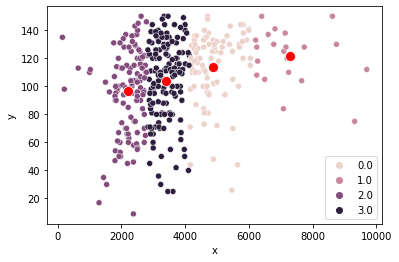

In [43]:
sns.scatterplot(X[:,0], X[:, 1], hue=clusters)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='red')
plt.xlabel('x')
plt.ylabel('y')

In [50]:
k = 4
kmedian = MyKMedian()
kmedian.fit(X, k)
centroids2, clusters2 = kmedian.centroids, kmedian.clusters

Text(0, 0.5, 'y')

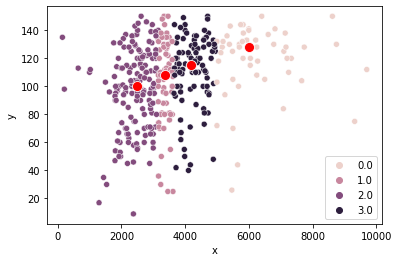

In [51]:
sns.scatterplot(X[:,0], X[:, 1], hue=clusters2)
sns.scatterplot(centroids2[:,0], centroids2[:, 1], s=100, color='red')
plt.xlabel('x')
plt.ylabel('y')

(22, 2)


<AxesSubplot:>

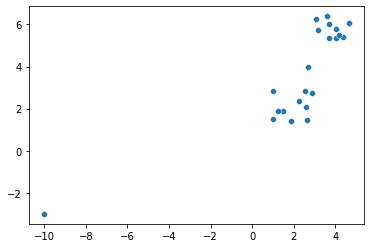

In [167]:
blob1 = [[2+random.uniform(-1,1), 2+random.uniform(-1,1)] for _ in range(10)]
blob2 = [[4+random.uniform(-1,1), 6+random.uniform(-1,1)] for _ in range(10)]
blob2.append([2.7, 4])
Z = np.array([[-10, -3], [1.011912023516296, 1.5168927137365245], [1.4768066919949765, 1.8754986516362342], [2.642927166902791, 1.4562940293368125], [2.5167134689220223, 2.849968258665048], [2.240181553206663, 2.351547717099643], [1.854885951477039, 1.4181398385029436], [2.8683218751964823, 2.7406774558558125], [1.2196516709864358, 1.8706667633370344], [2.588948743983239, 2.0857729311504043], [1.0228060595545112, 2.8370028805016627], [3.0594857840379777, 6.249769356410191], [4.352088575764137, 5.398497609244089], [4.0434772464986874, 5.356281249931453], [4.153923999469697, 5.518232338796011], [3.7052999809994747, 5.3749119895658], [3.5850058576976997, 6.3890000400412115], [4.022855428829764, 5.79710406828867], [3.709147281766435, 6.016869663425296], [4.630218788223818, 6.047669295642667], [3.18227565221874, 5.72248662734559], [2.7, 4]])
#Z = Z[..., np.newaxis]
print(Z.shape)
sns.scatterplot(Z[:,0], Z[:, 1])

Text(0, 0.5, 'y')

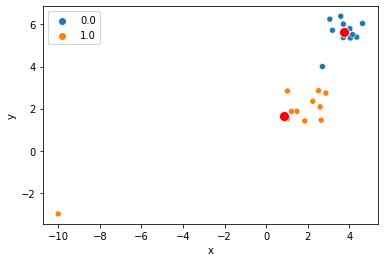

In [170]:
kmeans.fit(Z, 2)
centroids, clusters = kmeans.centroids, kmeans.clusters
sns.scatterplot(Z[:,0], Z[:, 1], hue=clusters)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='red')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

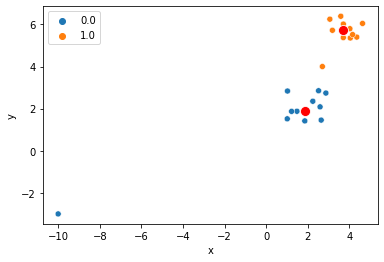

In [171]:
kmedian.fit(Z, 2)
centroids2, clusters2 = kmedian.centroids, kmedian.clusters
sns.scatterplot(Z[:,0], Z[:, 1], hue=clusters2)
sns.scatterplot(centroids2[:,0], centroids2[:, 1], s=100, color='red')
plt.xlabel('x')
plt.ylabel('y')